In [57]:
# Importar bibliotecas necessárias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [58]:
# Carregar o conjunto de dados
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv')


In [59]:
# Limpeza de dados e análise exploratória
# Verificar dados em falta
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [60]:
# Preencher dados em falta (como não falta não é necessario)
# data = data.fillna(method='ffill')

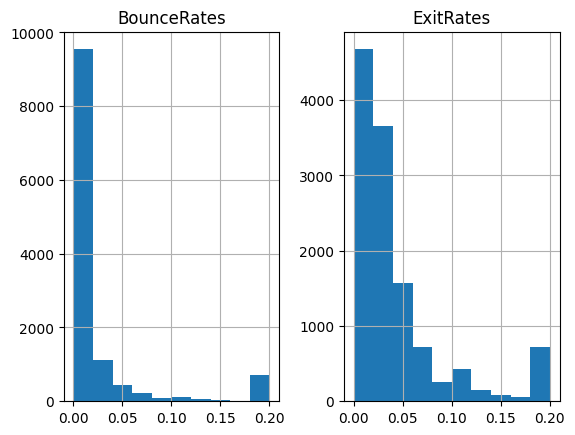

In [61]:
# Verificar a distribuição das taxas de rejeição (BounceRates) e saída (ExitRates)
data[['BounceRates', 'ExitRates']].hist()
plt.show()

In [62]:
# Pré-processamento
# Converter dados categóricos em numéricos
le = LabelEncoder()
data['Month'] = le.fit_transform(data['Month'])
data['VisitorType'] = le.fit_transform(data['VisitorType'])
data['Weekend'] = le.fit_transform(data['Weekend'])

In [63]:
# Dividir o conjunto de dados em características (X) e variável alvo (y)
X = data.drop('Revenue', axis=1)
y = data['Revenue']

In [64]:
# Dividir o conjunto de dados em conjunto de treino e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [65]:
# Escalonamento das características
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [66]:
# Aplicar o modelo de machine learning
# Usando Regressão Logística como exemplo
classificador = LogisticRegression(random_state=0)
classificador.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [67]:
# Prever os resultados do conjunto de teste
y_pred = classificador.predict(X_test)

In [68]:
# Avaliação do modelo
cm = confusion_matrix(y_test, y_pred)
print(cm)
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo: ", acuracia)

[[1994   50]
 [ 270  152]]
Acurácia do modelo:  0.870235198702352


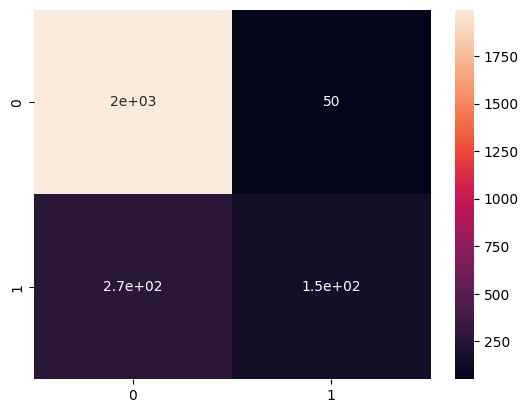

In [69]:
# Plotar a matriz de confusão
sns.heatmap(cm, annot=True)
plt.show()